# Credit Risk Resampling Techniques

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

# Machine Learning Libraries

In [19]:
# Importing libraries for data preparation and pre-processing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Importing libraries for regression and metrics reporting
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score, classification_report, confusion_matrix
from imblearn.metrics import classification_report_imbalanced

# Read the CSV into DataFrame

In [20]:
# Load the data
file_path = Path('Resources/lending_data.csv')
df = pd.read_csv(file_path)
df.head()

,loan_size,interest_rate,homeowner,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,own,52800,0.431818,5,1,22800,low_risk
1,8400.0,6.692,own,43600,0.311927,3,0,13600,low_risk
2,9000.0,6.963,rent,46100,0.349241,3,0,16100,low_risk
3,10700.0,7.664,own,52700,0.430740,5,1,22700,low_risk
4,10800.0,7.698,mortgage,53000,0.433962,5,1,23000,low_risk


# Split the Data into Training and Testing

In [21]:
# Create our features
X = df[[ 'loan_size','interest_rate', 'homeowner', 'borrower_income', 'debt_to_income', 'num_of_accounts', 'derogatory_marks', 'total_debt' ]]

# Create our target
y = df['loan_status']

In [22]:
X.describe(include='all')

,loan_size,interest_rate,homeowner,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
count,77536.000000,77536.000000,77536,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
unique,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,mortgage,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,38572,NaN,NaN,NaN,NaN,NaN
mean,9805.562577,7.292333,NaN,49221.949804,0.377318,3.826610,0.392308,19221.949804
std,2093.223153,0.889495,NaN,8371.635077,0.081519,1.904426,0.582086,8371.635077
min,5000.000000,5.250000,NaN,30000.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,NaN,44800.000000,0.330357,3.000000,0.000000,14800.000000
50%,9500.000000,7.172000,NaN,48100.000000,0.376299,4.000000,0.000000,18100.000000
75%,10400.000000,7.528000,NaN,51400.000000,0.416342,4.000000,1.000000,21400.000000


In [23]:
# Check the balance of our target values
y.value_counts()

low_risk     75036
high_risk     2500
Name: loan_status, dtype: int64

In [24]:
# Create X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)

In [25]:
y_train.value_counts()

low_risk     56277
high_risk     1875
Name: loan_status, dtype: int64

## Data Pre-Processing

Scale the training and testing data using the `StandardScaler` from `sklearn`. Remember that when scaling the data, you only scale the features data (`X_train` and `X_testing`).

In [26]:
X_train_binary = pd.get_dummies(X_train, columns=['homeowner'])

X_test_binary = pd.get_dummies(X_test, columns=['homeowner'])
X_test_binary.head(3)

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,homeowner_mortgage,homeowner_own,homeowner_rent
37214,11500.0,8.017,56000,0.464286,5,1,26000,0,1,0
2791,9700.0,7.227,48600,0.382716,4,0,18600,1,0,0
75901,16900.0,10.312,77600,0.613402,10,2,47600,0,1,0


In [27]:
# Create the StandardScaler instance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [28]:
# Fit the Standard Scaler with the training data
# When fitting scaling functions, only train on the training dataset
scaler.fit(X_train_binary)

StandardScaler()

In [29]:
# Scale the training and testing data
X_train_scaled = scaler.transform(X_train_binary)
X_test_scaled = scaler.transform(X_test_binary)

# Simple Logistic Regression

In [31]:
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_train_scaled, y_train)
model

LogisticRegression(random_state=1)

In [32]:
# Calculated the balanced accuracy score
y_pred = model.predict(X_test_scaled)
acc_score = balanced_accuracy_score(y_test, y_pred)

In [33]:
print(f'Accuracy Score: {acc_score}')

Accuracy Score: 0.9892813049736127


In [34]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(
    cm, 
    index=["High Risk", "Low Risk"], 
    columns=["Predicted High Risk", "Predicted Low Risk"]
)

print("Confusion Matrix")
display(cm_df)

Confusion Matrix


,Predicted High Risk,Predicted Low Risk
High Risk,615,10
Low Risk,102,18657


In [35]:
# Print the imbalanced classification report
clssfn_report = classification_report_imbalanced(y_test, y_pred, target_names= ['High_risk', 'Low_risk'], output_dict= True )

print('Imbalanced Classification Report:')
print(classification_report_imbalanced(y_test, y_pred))

Imbalanced Classification Report:
                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.86      0.98      0.99      0.92      0.99      0.98       625
   low_risk       1.00      0.99      0.98      1.00      0.99      0.98     18759

avg / total       0.99      0.99      0.98      0.99      0.99      0.98     19384



# Oversampling

In this section, you will compare two oversampling algorithms to determine which algorithm results in the best performance. You will oversample the data using the naive random oversampling algorithm and the SMOTE algorithm. For each algorithm, be sure to complete the folliowing steps:

1. View the count of the target classes using `Counter` from the collections library. 
3. Use the resampled data to train a logistic regression model.
3. Calculate the balanced accuracy score from sklearn.metrics.
4. Print the confusion matrix from sklearn.metrics.
5. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.

Note: Use a random state of 1 for each sampling algorithm to ensure consistency between tests

In [37]:
#Import Libraries
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import ClusterCentroids
from imblearn.combine import SMOTEENN

### Naive Random Oversampling

In [38]:
# Resample the training data with the RandomOversampler
ros = RandomOverSampler(random_state=1)
X_train_scaled_OS, y_train_OS = ros.fit_resample(X_train_scaled , y_train)

# View the count of target classes with Counter
print(y_train_OS.value_counts())

low_risk     56277
high_risk    56277
Name: loan_status, dtype: int64


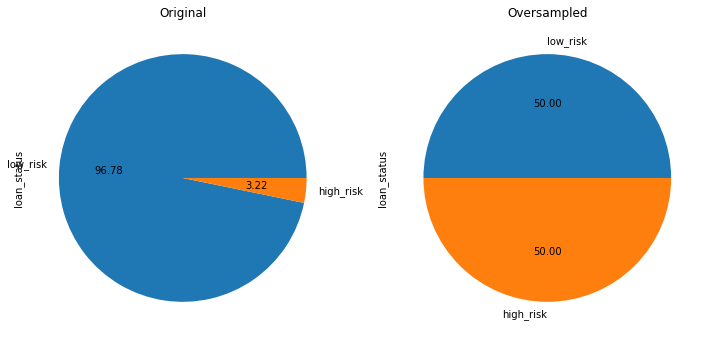

In [39]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
autopct = "%.2f"
y_train.value_counts().plot.pie(autopct=autopct, ax=axs[0])
axs[0].set_title("Original")
y_train_OS.value_counts().plot.pie(autopct=autopct, ax=axs[1])
axs[1].set_title("Oversampled")
fig.tight_layout()

In [44]:
# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_train_scaled_OS, y_train_OS)
model

LogisticRegression(random_state=1)

In [45]:
# Calculated the balanced accuracy score
y_pred_OS = model.predict(X_test_scaled)
acc_score_OS = balanced_accuracy_score(y_test, y_pred_OS)

In [46]:
print(f'Accuracy Score: {acc_score_OS}')

Accuracy Score: 0.9946414201183431


In [47]:
# Display the confusion matrix
cm_OS = confusion_matrix(y_test, y_pred_OS)

cm_df_OS = pd.DataFrame(
    cm_OS, 
    index=["High Risk", "Low Risk"], 
    columns=["Predicted High Risk", "Predicted Low Risk"]
)

print("Confusion Matrix")
display(cm_df_OS)

Confusion Matrix


,Predicted High Risk,Predicted Low Risk
High Risk,622,3
Low Risk,111,18648


In [48]:
# Print the imbalanced classification report
clssfn_report = classification_report_imbalanced(y_test, y_pred_OS, target_names= ['High_risk', 'Low_risk'], output_dict= True )

print('Imbalanced Classification Report:')
print(classification_report_imbalanced(y_test, y_pred_OS))

Imbalanced Classification Report:
                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.85      1.00      0.99      0.92      0.99      0.99       625
   low_risk       1.00      0.99      1.00      1.00      0.99      0.99     18759

avg / total       0.99      0.99      1.00      0.99      0.99      0.99     19384



### SMOTE Oversampling

In [49]:
# Resample the training data with SMOTE
smote = SMOTE(random_state=1)
X_train_scaled_SMOTE, y_train_SMOTE = smote.fit_resample(X_train_scaled, y_train)

# View the count of target classes with Counter
y_train_SMOTE.value_counts()

low_risk     56277
high_risk    56277
Name: loan_status, dtype: int64

In [50]:
# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_train_scaled_SMOTE, y_train_SMOTE)
model

LogisticRegression(random_state=1)

In [51]:
# Calculated the balanced accuracy score
y_pred_SMOTE = model.predict(X_test_scaled)
acc_score_SMOTE = balanced_accuracy_score(y_test, y_pred_SMOTE)

In [52]:
print(f'Accuracy Score: {acc_score_SMOTE}')

Accuracy Score: 0.9946680739911509


In [53]:
# Display the confusion matrix
cm_SMOTE = confusion_matrix(y_test, y_pred_SMOTE)

cm_df_SMOTE = pd.DataFrame(
    cm_SMOTE, 
    index=["High Risk", "Low Risk"], 
    columns=["Predicted High Risk", "Predicted Low Risk"]
)

print("Confusion Matrix")
display(cm_df_SMOTE)

Confusion Matrix


,Predicted High Risk,Predicted Low Risk
High Risk,622,3
Low Risk,110,18649


In [54]:
# Print the imbalanced classification report
print('Imbalanced Classification Report:')
print(classification_report_imbalanced(y_test, y_pred_SMOTE))

Imbalanced Classification Report:
                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.85      1.00      0.99      0.92      0.99      0.99       625
   low_risk       1.00      0.99      1.00      1.00      0.99      0.99     18759

avg / total       0.99      0.99      1.00      0.99      0.99      0.99     19384



# Undersampling

In this section, you will test an undersampling algorithm to determine which algorithm results in the best performance compared to the oversampling algorithms above. You will undersample the data using the Cluster Centroids algorithm and complete the folliowing steps:

1. View the count of the target classes using `Counter` from the collections library. 
3. Use the resampled data to train a logistic regression model.
3. Calculate the balanced accuracy score from sklearn.metrics.
4. Display the confusion matrix from sklearn.metrics.
5. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.

Note: Use a random state of 1 for each sampling algorithm to ensure consistency between tests

In [55]:
# Resample the data using the ClusterCentroids resampler
under_sampler = ClusterCentroids(random_state=1)
X_train_scaled_UndSmpl , y_train_UndSmpl = under_sampler.fit_resample(X_train_scaled , y_train)

# View the count of target classes with Counter
print(y_train_UndSmpl.value_counts())

high_risk    1875
low_risk     1875
Name: loan_status, dtype: int64


In [56]:
# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_train_scaled_UndSmpl, y_train_UndSmpl)
model

LogisticRegression(random_state=1)

In [57]:
# Calculate the balanced accuracy score
y_pred_UndSmpl = model.predict(X_test_scaled)
acc_score_UndSmpl = balanced_accuracy_score(y_test, y_pred_UndSmpl)

# Displaying  the accuracy score
print(f'Accuracy Score: {acc_score_UndSmpl}')

Accuracy Score: 0.9932813049736127


In [58]:
# Display the confusion matrix
cm_UndSmpl = confusion_matrix(y_test, y_pred_UndSmpl)

cm_df_UndSmpl = pd.DataFrame(
    cm_UndSmpl, 
    index=["High Risk", "Low Risk"], 
    columns=["Predicted High Risk", "Predicted Low Risk"]
)

print("Confusion Matrix")
display(cm_df_UndSmpl)

Confusion Matrix


,Predicted High Risk,Predicted Low Risk
High Risk,620,5
Low Risk,102,18657


In [59]:
# Print the imbalanced classification report
print('Imbalanced Classification Report:')
print(classification_report_imbalanced(y_test, y_pred_UndSmpl))

Imbalanced Classification Report:
                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.86      0.99      0.99      0.92      0.99      0.99       625
   low_risk       1.00      0.99      0.99      1.00      0.99      0.99     18759

avg / total       1.00      0.99      0.99      0.99      0.99      0.99     19384



# Combination (Over and Under) Sampling

In this section, you will test a combination over- and under-sampling algorithm to determine if the algorithm results in the best performance compared to the other sampling algorithms above. You will resample the data using the SMOTEENN algorithm and complete the folliowing steps:

1. View the count of the target classes using `Counter` from the collections library. 
3. Use the resampled data to train a logistic regression model.
3. Calculate the balanced accuracy score from sklearn.metrics.
4. Display the confusion matrix from sklearn.metrics.
5. Generate a classication report using the `imbalanced_classification_report` from imbalanced-learn.

Note: Use a random state of 1 for each sampling algorithm to ensure consistency between tests

In [60]:
# Resample the training data with SMOTEENN
combi_sampler = SMOTEENN(random_state=1)
X_train_scaled_SMOTEEN , y_train_SMOTEEN = combi_sampler.fit_resample(X_train_scaled , y_train)

# View the count of target classes with Counter
print(y_train_SMOTEEN.value_counts())

low_risk     55906
high_risk    55428
Name: loan_status, dtype: int64


In [61]:
# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_train_scaled_SMOTEEN, y_train_SMOTEEN)
model

LogisticRegression(random_state=1)

In [62]:
# Calculate the balanced accuracy score
y_pred_SMOTEEN = model.predict(X_test_scaled)
acc_score_SMOTEEN = balanced_accuracy_score(y_test, y_pred_SMOTEEN)

# Displaying  the accuracy score
print(f'Accuracy Score: {acc_score_SMOTEEN}')

Accuracy Score: 0.9946680739911509


In [63]:
# Display the confusion matrix
cm_SMOTEEN = confusion_matrix(y_test, y_pred_SMOTEEN)

cm_df_SMOTEEN = pd.DataFrame(
    cm_SMOTEEN, 
    index=["High Risk", "Low Risk"], 
    columns=["Predicted High Risk", "Predicted Low Risk"]
)

print("Confusion Matrix")
display(cm_df_SMOTEEN)

Confusion Matrix


,Predicted High Risk,Predicted Low Risk
High Risk,622,3
Low Risk,110,18649


In [64]:
# Print the imbalanced classification report
print('Imbalanced Classification Report:')
print(classification_report_imbalanced(y_test, y_pred_SMOTEEN))

Imbalanced Classification Report:
                   pre       rec       spe        f1       geo       iba       sup

  high_risk       0.85      1.00      0.99      0.92      0.99      0.99       625
   low_risk       1.00      0.99      1.00      1.00      0.99      0.99     18759

avg / total       0.99      0.99      1.00      0.99      0.99      0.99     19384



# Final Questions

1. Which model had the best balanced accuracy score?

The SMOTE Oversampled and the SMOTEENN Resampled models gave the best accuracy scores of 0.9947

2. Which model had the best recall score?

The Cluster Centroids Undersampled model gave the best recall score of 0.9945

3. Which model had the best geometric mean score?

The SMOTE Oversampled and the SMOTEENN Resampled models gave the best geometric mean score of 0.9947


